## Bars Graphs 

#### Including Stacked Bars.

The dataset used here is a Wine Dataset from kaggle. We are plotting (average) Fixed and Volatile acidity grouped by Quality as Bar graph and stacked Bars.

Let's import the pygal and pandas package. Read the csv file using pandas

In [1]:
import pygal
import pandas as pd

**Wine dataset from UCI Machine Learning repository. Notice the separator is ';' instead of ','** 

**Source:** https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
wine_dataframe = pd.read_csv('./datasets/winequality-red.csv', 
                             sep=';')

###### Look how the data looks 

In [3]:
wine_dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Describe the dataset

In [4]:
wine_dataframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Group the values by **'Quality'** and find the mean.

In [5]:
average_df = wine_dataframe.groupby(['quality']).mean()

In [6]:
average_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


###### We will choose **Acidity** i.e. **Fixed Acidity**. So, values are average fixed acidity by quality. Let'see the impact of the acidity (fixed acidity) on Qaulity of wine.

*Acidity refers to the how fresh, tart and sour the wine is.*


Initialize the pygal object and specify the **x_labels** to the **Quality of wines** ranging from 3 to 8. Also specify the other attributes as **title** and **x_title**

In [7]:
bar_chart = pygal.Bar(height = 360, 
                      width = 640, 
                      explicit_size = True)

bar_chart.title = 'Average Acidity By Wine Quality'

In [8]:
bar_chart.x_title = 'Quality Rating'

bar_chart.x_labels = range(3,9)

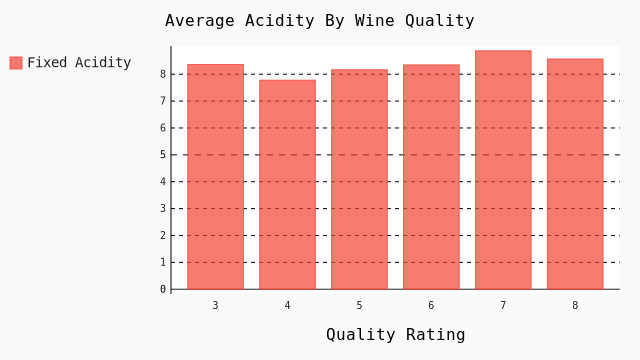

In [9]:
bar_chart.add('Fixed Acidity', 
              average_df['fixed acidity'])

Volatile acidity is **due to the bacteria** in the wine and it is usually a **sign of wine spoilage**. Let's compare the values to **Fixed acidity**.


In [10]:
average_df['volatile acidity']

quality
3    0.884500
4    0.693962
5    0.577041
6    0.497484
7    0.403920
8    0.423333
Name: volatile acidity, dtype: float64

##### Notice that we have passed the second last value as dictionary

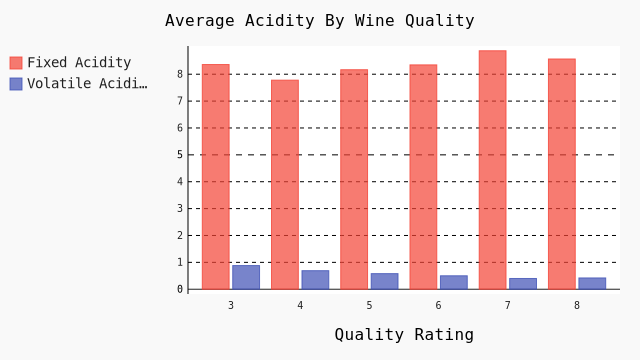

In [11]:
bar_chart.add('Volatile Acidity', 
              [0.88, 
               0.69, 
               0.58, 
               0.5, 
               {'value':0.4}, 
               0.42])

We see that **Quality - 3** has **high volatile acidity** when compared to **Quality-8** i.e almost half

The legend is not displayed properly. Add in the parameter **"truncate_legend=-1"**

In [12]:
bar_chart = pygal.Bar(height = 360, 
                      width = 640, 
                      explicit_size = True,
                      truncate_legend=-1)

In [13]:
bar_chart.x_labels = range(3, 9)
bar_chart.title = 'Average Acidity By Wine Quality'
bar_chart.x_title = 'Quality Rating'

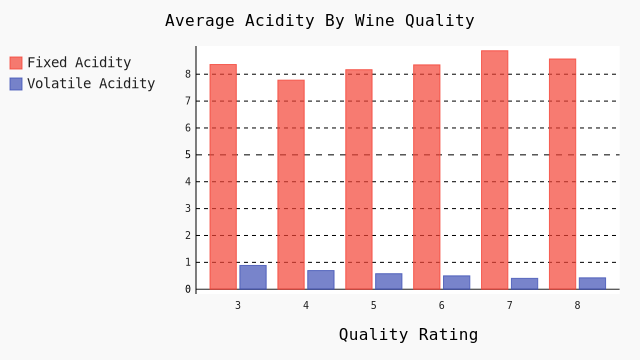

In [14]:
bar_chart.add('Fixed Acidity', 
              average_df['fixed acidity'])

bar_chart.add('Volatile Acidity', 
              average_df['volatile acidity'])

### Ways to display an interactive chart 

##### There are various ways of rending final output, one way is to *"render in the browser"* which will automatically open the graph in the web browser.

The url has to be manually copy pasted in the incognito mode as the new window will open only in the normal window of the browser.

In [15]:
%pip install lxml

bar_chart.render_in_browser()

Note: you may need to restart the kernel to use updated packages.
file:///tmp/tmpdvzyxueh.html


### Stacked Bars

You can visualize **Fixed Acidity** and **Volatile Acidity** as Stacked Bars i.e Both the values on top of each other. 

In [16]:
stack_bar = pygal.StackedBar(height = 360, 
                             width = 640, 
                             explicit_size = True,
                             truncate_legend=-1)


In [17]:
stack_bar.x_labels = range(3, 9)
stack_bar.title = 'Average Acidity By Wine Quality'
stack_bar.x_title = 'Quality Rating'

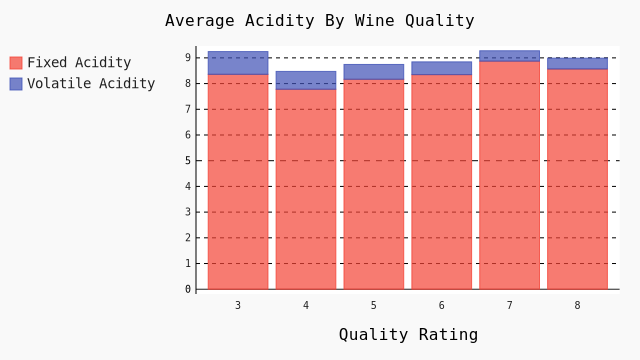

In [18]:
stack_bar.add('Fixed Acidity', 
              average_df['fixed acidity'])

stack_bar.add('Volatile Acidity', 
              average_df['volatile acidity'])

##### Render the Output in the Browser.

In [19]:
stack_bar.render_in_browser()

file:///tmp/tmpwokwnyas.html
